Ömer Kaan Vural <br>
21987537

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("Class1.csv")
df2 = pd.read_csv("Class2.csv")
df = df.iloc[:,1:]
df2 = df2.iloc[:,1:]

In [ ]:
df = df.T
df2 = df2.T

In [ ]:
df.head()

,0,1
0,-4.720424,-3.362143
1,-3.742321,-8.331641
2,-6.028277,-6.805899
3,-5.724047,-7.765060
4,-6.171944,-6.851828


In [ ]:
# Checking boundaries
def check_boundaries(df):
  x_max = np.max(df.iloc[:, 0])
  y_max = np.max(df.iloc[:, 1])
  x_min = np.min(df.iloc[:, 0])
  y_min = np.min(df.iloc[:, 1])
  return f"x_max: {x_max}\ny_max: {y_max}\nx_min: {x_min}\ny_min: {y_min}"

print(check_boundaries(df), "\n")
print(check_boundaries(df2))

x_max: -1.542843576
y_max: 3.156796462
x_min: -11.08864772
y_min: -12.78258863 

x_max: 10.47050794
y_max: 10.26848441
x_min: -1.531327458
y_min: -2.170484587


In [ ]:
import matplotlib.pyplot as plt

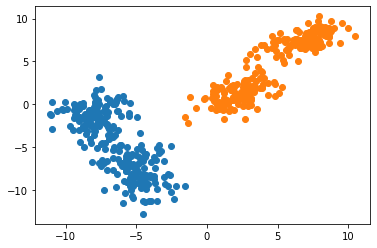

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df.iloc[:,0 ], df.iloc[:, 1])
ax.scatter(df2.iloc[:,0], df2.iloc[:, 1])

In [ ]:
import math

In [ ]:
# implementing kernel formula
def kernel(x,d):
  return 1/(math.pow(2*math.pi, d/2)) * math.exp((-1/2) * np.dot(x.T, x))

q = np.array([1,2])
print(np.dot(q.T, q))

5


In [ ]:
def kde_custom(d, h, point, points):
  n = len(points)
  return 1/(math.pow(h, d)*n) * sum(kernel((point - np.array(row)) / h, d) for row in points.itertuples(index=False))

In [ ]:
kde_densities = [kde_custom(2,1.5, np.array(row), df) for row in df.itertuples(index=False)]
kde_densities2 = [kde_custom(2,1.5, np.array(row2), df2) for row2 in df2.itertuples(index=False)]

In [ ]:
def plot_3d(df, lst, title):
  fig, ax = plt.subplots()
  ax = plt.axes(projection="3d")
  ax.plot_trisurf(df.iloc[:, 0], df.iloc[:, 1], np.array(lst),
                  cmap='viridis', edgecolor='none', antialiased=True)
  ax.set_title(title);

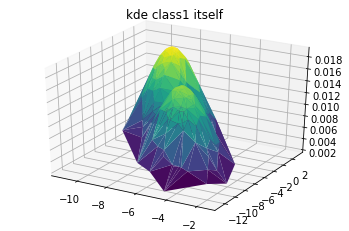

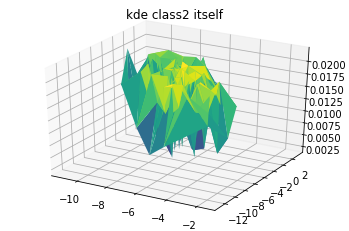

In [ ]:
plot_3d(df, kde_densities, "kde class1 itself")
plot_3d(df, kde_densities2, "kde class2 itself")

In [ ]:
from scipy.stats import kde

In [ ]:
# Controlling the result above with using "scipy"
x = df.iloc[:, 0]
y = df.iloc[:, 1]
nbins = 300
k = kde.gaussian_kde([x, y])
xi, yi = np.mgrid[x.min():x.max():0.1, y.min():y.max():0.1]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

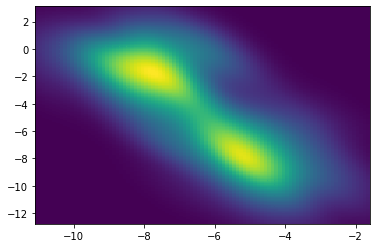

In [ ]:
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto')
plt.show()

In [ ]:
def euclidian_dist(point, point2):
  return math.sqrt(math.pow(point2[0] - point[0], 2) + math.pow(point2[1] - point[1], 2))

In [ ]:
# calculate knn_density with using euclidian distance then sorting and choosing process
def knn_density(dataset, point, k):
  distances = []
  for i in range(len(dataset)):
    distances.append(euclidian_dist(np.array(dataset.iloc[i,:]), point))

  distances_c = np.array(distances, copy=True)
  indexes = []
  for j in range(k + 1):
    indexes.append(np.argmin(distances_c))
    distances_c[np.argmin(distances_c)] = np.inf

  r = distances[indexes[-1]]
  n = len(dataset)
  return k / (n * math.pi * math.pow(r,2))

In [ ]:
p = np.array([-2,-4])
print(np.array(df.iloc[0,:]))
knn_density(df, p, 3)

[-4.7204237  -3.36214264]


0.0010524631159863902

In [ ]:
# every row in df goes to knn 
knn_densities = [knn_density(df, df.iloc[i,:], 3) for i in range(len(df))]
knn_densities2 = [knn_density(df2, df2.iloc[i,:], 3) for i in range(len(df2))]

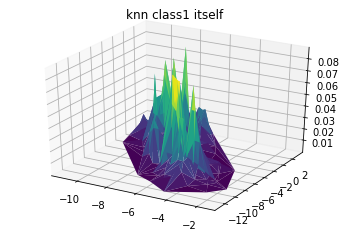

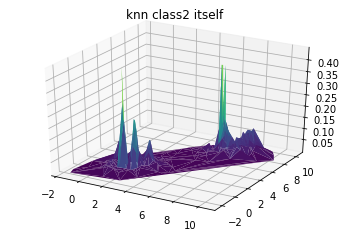

In [ ]:
plot_3d(df, knn_densities, "knn class1 itself")
plot_3d(df2, knn_densities2, "knn class2 itself")

In [ ]:
test_df = pd.read_csv("Test.csv")
test_df = test_df.iloc[:,1:].T
test_df.head()

,0,1
0,-3.917456,-8.048795
1,-4.760115,-4.991721
2,-4.562109,-9.382460
3,-7.869898,-6.721477
4,-6.328643,-3.673950


In [ ]:
test_knn_densities = [knn_density(df, test_df.iloc[i,:], 5) for i in range(len(test_df))]
test_knn_densities2 = [knn_density(df2, test_df.iloc[i,:], 5) for i in range(len(test_df))]

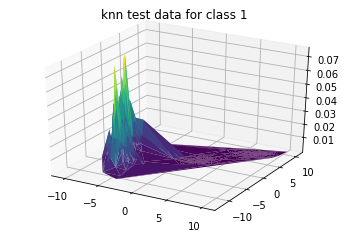

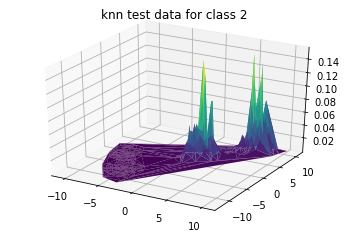

In [ ]:
plot_3d(test_df, test_knn_densities, "knn test data for class 1")
plot_3d(test_df, test_knn_densities2, "knn test data for class 2")

In [ ]:
# every row to the kde with df and df2 data
test_kde_densities = [kde_custom(2,1.5, np.array(r), df) for r in test_df.itertuples(index=False)]
test_kde_densities2 = [kde_custom(2,1.5, np.array(r), df2) for r in test_df.itertuples(index=False)]

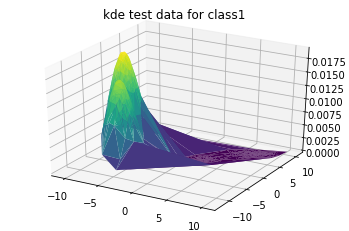

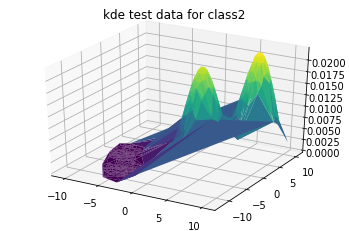

In [ ]:
plot_3d(test_df, test_kde_densities, "kde test data for class1")
plot_3d(test_df, test_kde_densities2, "kde test data for class2")

In [ ]:

# KNN density estimations table for test data according to class1 and class2 data
df_test_knn_result = test_df.copy()
df_test_knn_result["Class1 Estimation"] = test_knn_densities
df_test_knn_result["Class2 Estimation"] = test_knn_densities2
df_test_knn_result

,0,1,Class1 Estimation,Class2 Estimation
0,-3.917456,-8.048795,0.017592,0.000085
1,-4.760115,-4.991721,0.007538,0.000135
2,-4.562109,-9.382460,0.045228,0.000062
3,-7.869898,-6.721477,0.016555,0.000059
4,-6.328643,-3.673950,0.013277,0.000115
...,...,...,...,...
495,0.782546,-0.380385,0.000157,0.028605
496,1.882841,0.102964,0.000113,0.031946
497,0.621787,0.296767,0.000152,0.024664
498,1.970099,3.062402,0.000086,0.009567


In [ ]:
# KDE density estimation tables for test data according to class1 and class2 data
df_test_kde_result = test_df.copy()
df_test_kde_result["Class1 Estimation"] = test_kde_densities
df_test_kde_result["Class2 Estimation"] = test_kde_densities2
df_test_kde_result

,0,1,Class1 Estimation,Class2 Estimation
0,-3.917456,-8.048795,1.379870e-02,3.433644e-08
1,-4.760115,-4.991721,1.009326e-02,5.305651e-06
2,-4.562109,-9.382460,1.302946e-02,2.926306e-10
3,-7.869898,-6.721477,7.515509e-03,2.828487e-10
4,-6.328643,-3.673950,1.152197e-02,1.254802e-06
...,...,...,...,...
495,0.782546,-0.380385,7.996942e-07,1.266215e-02
496,1.882841,0.102964,3.165504e-08,1.758375e-02
497,0.621787,0.296767,5.374131e-07,1.452489e-02
498,1.970099,3.062402,5.355830e-10,1.273904e-02


In [ ]:
# Because of the equal amount of data
p_c1 = 0.5
p_c2 = 0.5

In [ ]:
# If we consider P(C|x)∝P(x|C)P(C), then P(C) effects anything because of the equality. 
# So we can basically say that posterior probability is proportional to likelihood
# P(C|x)∝P(x|C), we can label with likelihood

df_test_kde_result["Label"] = df_test_kde_result["Class1 Estimation"] > df_test_kde_result["Class2 Estimation"]
df_test_kde_result["Label"] = df_test_kde_result["Label"].astype(int)
df_test_kde_result["Label"] = df_test_kde_result["Label"].replace(0,2)

In [ ]:
df_test_kde_result["Label"].value_counts()

1    250
2    250
Name: Label, dtype: int64

In [ ]:
# Labeling with comparing two columns 
df_test_knn_result["Label"] = df_test_knn_result["Class1 Estimation"] > df_test_knn_result["Class2 Estimation"]
df_test_knn_result["Label"] = df_test_knn_result["Label"].astype(int)
df_test_knn_result["Label"] = df_test_knn_result["Label"].replace(0,2)

In [ ]:
df_test_knn_result["Label"].value_counts()

1    250
2    250
Name: Label, dtype: int64

In [ ]:
# Bandwith changes --> 0.5, 1, 1.5, ... , 8
# Up to 8 there is no change in labels. In 8 just one sample is predicted opposite. (251, 249)

In [ ]:
df_result = test_df.copy()
df_result["KDE Classification"] = df_test_kde_result["Label"]
df_result["KNN Classification"] = df_test_knn_result["Label"]
df_result

,0,1,KDE Classification,KNN Classification
0,-3.917456,-8.048795,1,1
1,-4.760115,-4.991721,1,1
2,-4.562109,-9.382460,1,1
3,-7.869898,-6.721477,1,1
4,-6.328643,-3.673950,1,1
...,...,...,...,...
495,0.782546,-0.380385,2,2
496,1.882841,0.102964,2,2
497,0.621787,0.296767,2,2
498,1.970099,3.062402,2,2


In [ ]:
df_result.to_csv('output.csv', index=False)

PART 2

In [ ]:
data = pd.read_csv("train.csv")
data = data.iloc[:, 1:]
data.head()

,0,0.1
0,0.036145,103.735650
1,-2.566265,101.733997
2,1.771084,106.044673
3,-1.337349,103.021960
4,-1.698795,101.366718


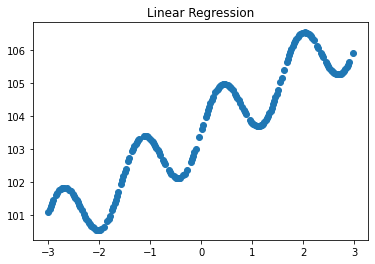

In [ ]:
x_train = data["0"].values
y_train = data["0.1"].values
fig, ax = plt.subplots()
ax.set_title("Linear Regression")
ax.scatter(x_train,y_train)

In [ ]:
# values to vector 
x_train = x_train.reshape(- 1, 1)
y_train = y_train.reshape(- 1, 1)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
test = pd.read_csv("test.csv")
# ignoring unnecessary cols
test = test.iloc[:, 1:]
test.head()

,0,0.1
0,-2.879518,101.542488
1,1.963855,106.519285
2,0.927711,103.944140
3,-0.662651,102.421281
4,2.325301,106.003991


In [ ]:
x_test = test["0"].values
y_test = test["0.1"].values
x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

Predictions

In [ ]:
predictions = reg.predict(x_test)

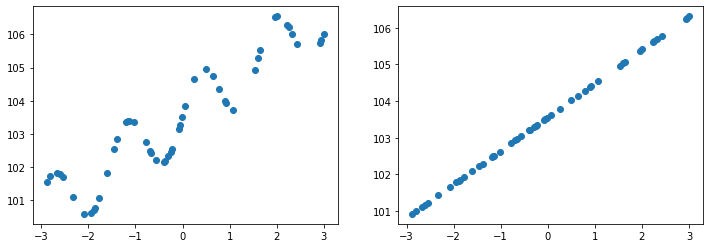

In [ ]:
fig2, ax2 = plt.subplots(1,2, figsize=(12,4))
ax2[0].scatter(x_test, y_test)
ax2[1].scatter(x_test, predictions)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# mse is choosed as a metric
mean_squared_error(y_test, predictions)

0.49125756218925687

Lasso Model

In [ ]:
from sklearn import linear_model
reg_lasso = linear_model.Lasso(alpha=0.1)

In [ ]:
reg_lasso.fit(x_train, y_train)

Lasso(alpha=0.1)

In [ ]:
lasso_predictions = reg_lasso.predict(x_test)

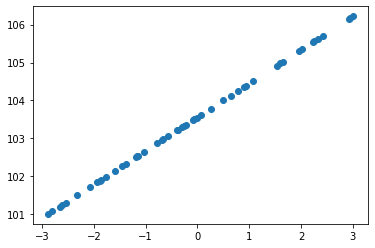

In [ ]:
plt.scatter(x_test, lasso_predictions)

In [ ]:
reg_lasso.score(y_test, lasso_predictions)

-3806.980345966511

Ridge Model

In [ ]:
from sklearn.linear_model import Ridge
reg_ridge = Ridge(alpha=1.0)

In [ ]:
reg_ridge.fit(x_train, y_train)

Ridge()

In [ ]:
ridge_predictions = reg_ridge.predict(x_test)

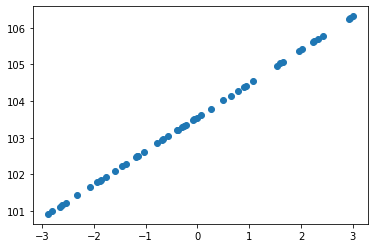

In [ ]:
plt.scatter(x_test, ridge_predictions)

Min Max Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_mms = x_train
scaler.fit(x_train_mms)
x_train_mms = scaler.transform(x_train_mms)

In [ ]:
reg_mm_scaled = LinearRegression()

In [ ]:
reg_mm_scaled.fit(x_train_mms, y_train)

LinearRegression()

In [ ]:
scaled_predictions = reg_mm_scaled.predict(x_test)

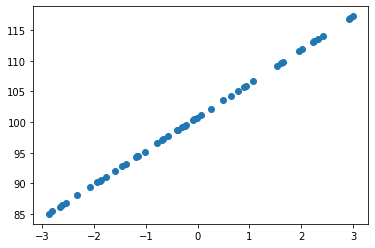

In [ ]:
plt.scatter(x_test, scaled_predictions)

Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
x_train_ss = standard_scaler.fit_transform(x_train)

In [ ]:
reg_ss_scaled = LinearRegression()
reg_ss_scaled.fit(x_train_ss, y_train)

LinearRegression()

In [ ]:
scaled_predictions2 = reg_ss_scaled.predict(standard_scaler.fit_transform(x_test))

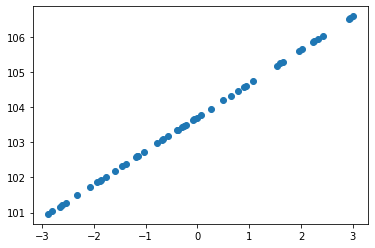

In [ ]:
plt.scatter(x_test, scaled_predictions2)

Scaling does not effect when the data has <b>only one</b> attribute